### IR Wavefunction

$$
\newcommand{\ket}[1]{\vert{#1}\rangle}\\
\newcommand{\bra}[1]{\langle{#1}\vert}\\
\ket{\text{IR}} = \ket{\hat n_{k_{-2}} = \hat n_{k_{-3}} = 2} \otimes \frac{1}{2}\bigg[ \ket{\uparrow^d}\frac{1}{\sqrt 2}\left(\ket{k_1 \downarrow} + \ket{k_{-1} \downarrow}\right) - \ket{\downarrow^d}\frac{1}{\sqrt 2}\left(\ket{k_1 \uparrow} + \ket{k_{-1} \uparrow}\right) + \ket{2^d}\ket{0} - \ket{0^d}\ket{k_1 \uparrow, k_1 \downarrow,k_{-1} \uparrow,k_{-1} \downarrow}\bigg] \otimes  \ket{\hat n_{k_{2}} = \hat n_{k_{3} } = 0} = \ket{1111}\ket{0000}\\
=\frac{1}{2}\ket{0000} \otimes \left[\ket{10}\ket{0101} - \ket{01}\ket{1010} + \ket{11}\ket{0000} - \ket{00}\ket{1111}\right] \otimes \ket{1111}\\
=\frac{1}{2}\ket{0000} \otimes \left[\ket{01} \underbrace{\ket{10}}_\text{imp}\ket{01} - \ket{10}\underbrace{\ket{01}}_\text{imp}\ket{10} + \ket{00}\underbrace{\ket{11}}_\text{imp}\ket{00} - \ket{11}\underbrace{\ket{00}}_\text{imp}\ket{11}\right] \otimes \ket{1111}\\
U^\dagger_{k_+, k_-} = \frac{1}{2}\left[1 + \eta_{k_- \uparrow} + \eta^\dagger_{k_+ \uparrow} + \eta_{k_- \downarrow} + \eta^\dagger_{k_+ \downarrow}\right] \\
 \\
\eta_{k_+\beta}^\dagger = V \left[\lambda_2 \hat n_{d\overline\beta} + \lambda_1 \left( 1 - \hat n_{d \overline \beta} \right)  \right]c^\dagger_{q\beta}c_{d\beta} + \lambda_3 \sum_{k} \left\{ \frac{J}{2}\left( S_d^z \beta c^\dagger_{q\beta}c_{k\beta} + c^\dagger_{d \overline \beta}c_{d\beta}c^\dagger_{q\beta}c_{k \overline \beta}\right) + \frac{K}{2}\left( C^z_d c^\dagger_{q\beta}c_{k\beta} + c^\dagger_{q\beta}c^\dagger_{k \overline \beta}c_{d \overline \beta}c_{d\beta} \right) \right\}\\
\eta_{k_-\beta} = V^* \left[\lambda_1 \hat n_{d \overline \beta} + \lambda_2 \left( 1 - \hat n_{d \overline \beta} \right)  \right]c^\dagger_{d\beta}c_{q\beta} + \lambda_3 \sum_{k} \left\{ \frac{J}{2}\left( S_d^z \beta c^\dagger_{k\beta}c_{q\beta} + c^\dagger_{d\beta}c_{d \overline \beta}c^\dagger_{k \overline \beta}c_{q\beta}\right)+ \frac{K}{2}\left( C^z_d c^\dagger_{k\beta}c_{q\beta} + c^\dagger_{d\beta}c^\dagger_{d \overline \beta}c_{k \overline \beta}c_{q\beta} \right) \right\} \\
\lambda_1 = \frac{1}{\omega - \frac{1}{2}D + \epsilon_d + \frac{1}{2}K}, \lambda_2 = \frac{1}{\omega - \frac{1}{2}D - \epsilon_d + \frac{1}{2}J}, \lambda_3 = \frac{1}{\omega - \frac{1}{2}D + \frac{1}{4}\left(J + K\right)} 
$$

In [2]:
# !pip install qutip
from qutip import *
from math import *
import itertools
from itertools import product
import matplotlib
from matplotlib import pyplot as plt

import numpy as np

font = {'size'   : 17}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 6, 4
#plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

idt = identity(2)
n = create(2) * destroy(2)

Cdz = 0.5 * (tensor(n, idt) +  tensor(idt, n) - 1)
# isospin z component

 

### Writing the impurity+cloud wavefunction

In [2]:
def get_cloud(csm, ccm, ins):
    d_up = [basis(2,1), basis(2,0)]
    d_dn = [basis(2,0), basis(2,1)]
    d_c_up = [basis(2,1), basis(2,1)]
    d_c_dn = [basis(2,0), basis(2,0)]
    d_cl_u_d = 0
    d_cl_d_u = 0
    momenta_range = list(range(0, 2*ins, 2))+list(range(2*ins+2, 4*ins+2, 2))
    for k in momenta_range:
        base_u = [basis(2,0)]*2*ins + d_up + [basis(2,0)]*2*ins
        base_d = [basis(2,0)]*2*ins + d_dn + [basis(2,0)]*2*ins
        base_d[k] = basis(2,1)
        base_u[k+1] = basis(2,1)
        d_cl_u_d += tensor(base_u)
        d_cl_d_u += tensor(base_d)
    d_cl_d_u = d_cl_d_u.unit()
    d_cl_u_d = d_cl_u_d.unit()
    d_cl_c_u_d = tensor([basis(2,0)]*2*ins + d_c_up + [basis(2,0)]*2*ins)
    d_cl_c_d_u = 0
    for k,q in itertools.product(momenta_range, momenta_range):
        base_c_d = [basis(2,0)]*2*ins + d_c_dn + [basis(2,0)]*2*ins
        base_c_d[k] = basis(2,1)
        base_c_d[q + 1] = basis(2,1)
        d_cl_c_d_u += tensor(base_c_d)
    d_cl_c_d_u = d_cl_c_d_u.unit()
#     up = [1, 0, 0, 1, 0, 1]
#     down = [0, 1, 1, 0, 1, 0]
#     two = [1, 1, 0, 0, 0, 0]
#     zero = [0, 0, 1, 1, 1, 1]
#     cloudup = csm * tensor([basis(2,i) for i in up])
#     clouddown = csm * tensor([basis(2,i) for i in down])
#     cloudtwo = ccm * tensor([basis(2,i) for i in two])
#     cloudzero = ccm * tensor([basis(2,i) for i in zero])
#     psi_cloud = tensor(cloudup - clouddown + cloudtwo + cloudzero)
    psi_unnorm = csm * (d_cl_u_d - d_cl_d_u) + ccm * (d_cl_c_d_u + d_cl_c_u_d)
    return psi_unnorm.unit()   

## Creating the unitary

$ \eta^{\dagger/-} = \eta_1^{\dagger/-} + \eta_2^{\dagger/-} + \eta_3^{\dagger/-}$

### Create $c^\dagger_{q\beta}\otimes I_{\overline\beta}$ or $c_{q\beta}\otimes I_{\overline\beta}$

In [3]:
def cq(beta, conj):
    cq_ = create(2) if conj == 1 else destroy(2)
    # use c^dagger_q is conj == 1 else c_q

    return tensor([cq_, idt]) if beta == 1 else tensor([idt, cq_])
    # place cq first if beta == up else place idt first

### Creating $\sum_k c_{k\beta}$

In [4]:
def sum_k_ck(beta, conj, imp):
    # returns \sum_{k}c_{k\beta} or its conjugate
    
    ck = ([create(2), idt] if beta == 1 else [idt, create(2)]) if conj == 1 else ([destroy(2), idt] if beta == 1 else [idt, destroy(2)])
    # variable conj is supposed to tell me whether i require \sum_k c^\dagger_k or \sum_k c_k

    init = [idt]*2*ins + [imp] + [idt]*2*ins
    sum_over_k = 0
    for k in list(range(0, 2*ins, 2)) + list(range(2*ins+1, 4*ins+1, 2)):
        sum_over_k += tensor(init[:k] + ck + init[k+2:])
#     sum_over_k = sum([tensor(init[:2*k] + ck + init[2*k+1:]) for k in range(2*ins)])

#     num = 2 * ins
#     for i in range(num):
#         # outer loop shifts the position of k over all cloud momenta

#         cur = 0
#         for j in range(num):
#             # inner loop creates the string for a particular k

#             if i != j: # if not the particular k, fill with idt
#                 cur = tensor(cur, idt, idt) if cur !=0 else tensor(idt, idt)
#             elif beta == 1: 
#                 # otherwise, check if spin is up or down, up goes first, down goes second
#                 cur = tensor(cur, ck, idt) if cur !=0 else tensor(ck, idt)
#             else: 
#                 cur = tensor(cur, idt, ck) if cur !=0 else tensor(idt, ck)
#         sum = cur if sum == 0 else sum + cur 
#     return sum
    return sum_over_k

### Creating first part of $\eta$

$$
V \left[\lambda_2 \hat n_{d\overline\beta} + \lambda_1 \left( 1 - \hat n_{d \overline \beta} \right)  \right]c^\dagger_{q\beta}c_{d\beta}
$$
or
$$
V^* \left[\lambda_1 \hat n_{d \overline \beta} + \lambda_2 \left( 1 - \hat n_{d \overline \beta} \right)  \right]c^\dagger_{d\beta}c_{q\beta}
$$

In [5]:
def eta1(beta, conj, args):
    c1, c2, c3, V, J, K = args
    
    c_q = cq(beta, conj)
    # gets either c^\dagger_{q\beta}\otimes identity(q\ol\beta), or c_{q\beta}iden(q\ol\beta), depending on conj=\pm 1

    betaSdz = beta * 0.5 * (tensor(n, idt) - tensor(idt, n))
    # gets \beta S_d^z

    cimp = create(2) if conj == -1 else destroy(2)
    # impurity beta operator will be c_{d\beta} if conj = 1 else c^\dagger_{d\beta}
    
    imp_part = [cimp, c2 * n + c1 * (1-n)] if beta == 1 else [c2 * n + c1 * (1-n), cimp]
    # the full impurity part will be cimp \otimes idt(2) if beta is up, else idt(2) \otimes cimp,
    # because up part comes first

    cloud_imp_part = tensor([idt]*2*ins + imp_part + [idt]*2*ins)
    # cloud electrons do not participate in this part of eta, hence just identities. 
    # (ins) is number of k states on one side of FS, *2 for both sides, another *2 for spin 

    if conj == 1:
        return V * tensor(c_q, cloud_imp_part, identity(2), identity(2))
    else:
        return V * tensor(identity(2), identity(2), cloud_imp_part, c_q)
    # if conj == 1 (if we are creating eta^dagger), then q is above the FS and eta_1 will be 
    # c^\dagger_q \otimes imp_part \otimes cloud_part, otherwise it will be imp_part \otimes cloud_part \otimes c_q,
    # because q will be below the FS

### Creating second part of $\eta$

$$
\lambda_3 \sum_{k} \frac{J}{2}c^\dagger_{q\beta}\left( S_d^z \beta c_{k\beta} + c^\dagger_{d \overline \beta}c_{d\beta}c_{k \overline \beta}\right), \text{ conj} == 1
$$
or
$$
\lambda_3 \sum_{k} \frac{J}{2}\left( S_d^z \beta c^\dagger_{k\beta} + c^\dagger_{d\beta}c_{d \overline \beta}c^\dagger_{k \overline \beta}\right)c_{q\beta}, \text{ conj} == -1
$$
The impurity part can be written as
$$
\text{imp-part} = \begin{cases} c^\dagger_{d\uparrow}c_{d \downarrow}, \text{ if }\beta \neq \text{conj} \\ -c_{d\uparrow}c^\dagger_{d \downarrow}, \text{ if }\beta == \text{conj} \end{cases}
$$
Cloud part is $\sum_k c_{k\beta}(conj)$

In [6]:
def eta2(beta, conj, args):
    c1, c2, c3, V, J, K = args
    
    betaSdz = beta * 0.5 * (tensor(n, idt) - tensor(idt, n))
    # gets \beta S_d^z
        
    c_q = cq(beta, conj)
    # gets either c^\dagger_{q\beta}\otimes identity(q\ol\beta), or c_{q\beta}iden(q\ol\beta), depending on conj=\pm 1

    imp_part = -tensor(destroy(2), create(2)) if conj == beta else tensor(create(2), destroy(2))
    
    k_beta_1 = sum_k_ck(beta, -conj, betaSdz)
    k_beta_bar_2 = sum_k_ck(-beta, -conj, imp_part)

    if conj == 1:
        return (c3 / 2) * J * (tensor(c_q, k_beta_1, identity(2), identity(2)) + tensor(c_q, k_beta_bar_2, identity(2), identity(2)))
    else:
        return (c3 / 2) * J * (tensor(identity(2), identity(2), k_beta_1.dag(), c_q) + tensor(identity(2), identity(2), k_beta_bar_2.dag(), c_q))

### Creating third part of $\eta$

$$
\lambda_3 \sum_{k} \frac{K}{2}\left( C^z_d c^\dagger_{q\beta}c_{k\beta} + c^\dagger_{q\beta}c^\dagger_{k \overline \beta}c_{d \overline \beta}c_{d\beta} \right)
$$
or
$$
\lambda_3 \sum_{k} \frac{K}{2}\left( C^z_d c^\dagger_{k\beta}c_{q\beta} + c^\dagger_{d\beta}c^\dagger_{d \overline \beta}c_{k \overline \beta}c_{q\beta} \right)
$$
Impurity part is
$$
\text{imp-part} = \begin{cases}-c_{d \uparrow}c_{d \downarrow}, \beta = \text{conj} = 1 \\
c_{d \uparrow}c_{d \downarrow}, \beta = -1, \text{conj} = 1 \\
c^\dagger_{d \uparrow}c^\dagger_{d \downarrow}, \beta = 1, \text{conj} = -1 \\
-c^\dagger_{d \uparrow}c^\dagger_{d \downarrow}, \beta = \text{conj} = -1 \end{cases} = -(\beta \times \text{conj}) * (c_{d \uparrow}c_{d \downarrow})(conj)
$$
The cloud parts are
$$
\sum_k(\beta, -conj) \text{ and }\sum_k(-\beta, conj)
$$

In [7]:
def eta3(beta, conj, args):
    c1, c2, c3, V, J, K = args
               
    c_q = cq(beta, conj)
    # gets either c^\dagger_{q\beta}\otimes identity(q\ol\beta), or c_{q\beta}iden(q\ol\beta), depending on conj=\pm 1

    imp_part = -beta*conj*(tensor(destroy(2), destroy(2)) if conj == 1 else tensor(create(2), create(2)))
    
    k_beta_1 = sum_k_ck(beta, -conj, Cdz)
    k_beta_bar_2 = sum_k_ck(-beta, conj, imp_part)

    if conj == 1:
        return (c3 / 2) * K * (tensor(c_q, k_beta_1, identity(2), identity(2)) + tensor(c_q, k_beta_bar_2, identity(2), identity(2)))
    else:
        return (c3 / 2) * K * (tensor(identity(2), identity(2), k_beta_1.dag(), c_q) + tensor(identity(2), identity(2), k_beta_bar_2.dag(), c_q))

In [8]:
def rev_one_step(psi, out, ins, args=[1]*4):

    Udag = 1/2
    Upsi = psi/2
    for conj, beta in product([1, -1], [1, -1]):   
        # conj = 1 means eta dagger (q is above FS), conj = -1 means eta (q is below)

        iom1 = 2*(out - 1) if conj == 1 else 2 * out
        iom2 = 2*(out - 1) if conj == -1 else 2 * out
        # iom1 == k states above the FS that are unchanged b4 & after this reverse RG step.
        # If conj == 1, that means I am working with a q that's empty, so iom1 will lose 2 states (q up, q down).
        # iom2 will lose two states if the electron being re-entangled is below FS, that is if conj == -1
        U, J, K, V, D, w = args
        
        c1 = 1/(w - D/2 - U/2 + K/2)
        c2 = 1/(w - D/2 + U/2 + J/2)
        c3 = 1/(w - D/2 + K/4 + J/4)

        args = (c1, c2, c3, V, J, K)
        
        eta_1 = eta1(beta, conj, args)
        eta_2 = eta2(beta, conj, args)
        eta_3 = eta3(beta, conj, args)
#         print (eta_1)
#         print (eta_2)
#         print (eta_3)
#         print (Upsi)
        c = 1
        for eta_beta_conj in [eta_1, eta_2, eta_3]:
#             print (eta_beta_conj)
#             print (psi)
#             print (c)
            c += 1
#             for k in range(iom1):
#                 eta_beta_conj = tensor(idt, eta_beta_conj)
#             for k in range(iom2):
#                 eta_beta_conj = tensor(eta_beta_conj, idt)
            Upsi += 0.5 * eta_beta_conj(psi)
#         eta_beta_conj = eta_3 + eta_2 + eta_1
        # get eta for this value of beta and conf.
        # For example, this is the eta for k=+1 and beta = up
        
        # add the iom identity parts
#         for k in range(iom1):
#             eta_beta_conj = tensor(idt, eta_beta_conj)
#         for k in range(iom2):
#             eta_beta_conj = tensor(eta_beta_conj, idt)
#         # Udag += eta_beta_conj/2
#         Upsi += 0.5 * eta_beta_conj(psi)
        eta_beta_conj =  eta_1 = eta_2 = _eta_3 = []
    
    
    # return Udag(psi)
    return Upsi



## Measures of Entanglement

### Mutual Information

$
\rho = \text{density matrix} = \ket{\Psi}\bra{\Psi}
$
,
$
I(A:B) = S_A + S_B - S_{AB}
$
,
$
S_X = \text{Tr}_X \left[{\rho}\right]
$

In [9]:
def ptrace(psi, indices):
    N = 4*(out + ins) + 2
    bit = [basis(2, 0), basis(2, 1)]
    # gen = [bit]*(a) + [[0]] + [bit]*(N-a-1)
    gen = [bit] * N
    for i in indices:
        gen[i] = [identity(2)]
    dm_a = 0
    for term in tqdm(itertools.product(*gen), total=2**(N-2)):
        base = tensor(*term)
        bra = psi.dag() * base
        dm_a += bra.dag() * bra
    return dm_a


In [10]:
def mut_inf(psi, a, b):

    
    # rho = psi * psi.dag()
    # rho_ab = rho.ptrace([a, b])
    # rho_a = rho.ptrace(a)
    # rho_b = rho.ptrace(b)

    N = 4*(out + ins) + 2
    bit = [basis(2, 0), basis(2, 1)]
    gen = [[identity(2)]] * N
    i = 0
    while gen.count(bit) < N - 14:
        if i not in (a,b):
            gen[i] = bit
            a = a - 1 if i < a else a
            b = b - 1 if i < b else b
        i += 1

    tot = gen.count(bit)
    if tot > 0:
        rho_ab = 0
        for term in tqdm(itertools.product(*gen), total=2**tot):
            # base = tensor(*term)
            bra = psi.dag() * tensor(*term)
            rho_ab += bra.dag() * bra
#         a = 0 if a <= N - 14 - 1 else a - (N - 14)
#         b = 0 if b <= N - 14 - 1 else b - (N - 14)
    else:
        rho_ab = psi * psi.dag()
    
    rho_ab = rho_ab.ptrace([a,b])
    rho_a = rho_ab.ptrace(int(a>b))
    rho_b = rho_ab.ptrace(int(a<b))


    S_a = entropy_vn(rho_a) 
    S_b = entropy_vn(rho_b)
    S_ab = entropy_vn(rho_ab)

    return S_a + S_b - S_ab

In [15]:
def corr(psi):
    print (ins)
    spin = tensor([idt]*(2*out + 2*ins - 2) + [n, idt, idt, idt, idt, n] + [idt]*(2*out + 2*ins - 2))
    # n_{1 down} n_{-1 up}

    charge = tensor([idt]*(2*out + 2*ins) + [idt, idt, idt, idt, n, n] + [idt]*(2*out + 2*ins - 4))
    # n_{2 up} n_{2 dn}

#     off_diag_1 = tensor([idt]*(2*out + 2*ins - 1) + [create(2), idt, idt, destroy(2)] + [idt]*(2*out + 2*ins - 1))
    # c^\dagger_{1 down}c_{-1 up}

#     off_diag_2 = tensor([idt]*(2*out + 2*ins - 2) + [create(2), idt, idt, idt, destroy(2)] + [idt]*(2*out + 2*ins - 1))
#     # c^\dagger_{1 up}c_{-1 up}
    
#     off_diag_3 = tensor([idt]*(2*out + 2*ins - 2) + [create(2), create(2), idt, idt, destroy(2), destroy(2)] + [idt]*(2*out + 2*ins - 2))
#     # c^\dagger_{1 up} c^\dagger_1 dn} c_{-1 up} c_{-1 dn}

#     off_diag_4 = tensor([idt]*(2*out + 2*ins -4) + [create(2), idt, idt, destroy(2), idt, idt, idt, create(2), destroy(2), idt] + [idt]*(2*out + 2*ins - 4))
                                                    # cdag up             c down      i m p         cdag down     c up   
#     if spin == off_diag_4:
#         print ("same")
    # c^\dagger_{2 up} c^\dagger_{1 dn} c_{-1 dn} c_{-2 up}
    c = []
    c.append(np.real(psi.dag() * spin * psi)[0][0])
    c.append(np.real(psi.dag() * charge * psi)[0][0])
#     c.append(np.real(psi.dag() * off_diag_1 * psi)[0][0])
#     c.append(np.real(psi.dag() * off_diag_2 * psi)[0][0])
#     c.append(np.real(psi.dag() * off_diag_4 * psi)[0][0])
    return c
#     return np.real(psi.dag() * off_diag_4 * psi)[0][0]

In [16]:
from tqdm import tqdm
from multiprocessing import Pool

out = 1
# no of momenta states outside cloud, on each side of FS

ins = 2
# no of momenta states inside cloud, on each side of FS

lastup = 0
# position of the last electron to get recoupled

imp_up = 2 * (ins + out) 
imp_down = imp_up + 1

a = 1
b = 1
cloud1up = imp_up - a
cloud2up = imp_up + b
# positions of the innermost cloud electrons

U =  [0, 0, 0, 0, 0.06463131507519854, 0.3832892301648289, 0.81035398312819, 0.9653022499322309, 1]
J =  [0.4671215288625387, 0.1610471732413586, 0.09292714506948394, 0.06570355318275373, 0.0515190332875324, 0.04292128519020507, 0.0371787477122733, 0.03307692307692307, 0.03]
K =  [0.4671215288625387, 0.1610471732413586, 0.09292714506948394, 0.06570355318275373, 0.0515190332875324, 0.04292128519020507, 0.0371787477122733, 0.03307692307692307, 0.03]
V =  [3.31196040544157, 0.8600731642469739, 0.40964223204281247, 0.2526301643610369, 0.17618732751694133, 0.12356402131908403, 0.06672654361752858, 0.032185777536821183, 0.02]
count =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
D =  [0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]

# U =  [0, 0, 0, 0, 0, 0.15443547142118325, 0.4284025748088535, 0.7238155813919722, 0.9243349753694581, 1]
# J =  [0.5792634811262696, 0.15908249187876236, 0.08657117090403557, 0.059950720028602564, 0.0466357045034351, 0.03874698140457943, 0.03355045132998477, 0.029871359402525343, 0.027127659574468086, 0.025]
# K =  [0.5792634811262696, 0.15908249187876236, 0.08657117090403557, 0.059950720028602564, 0.0466357045034351, 0.03874698140457943, 0.03355045132998477, 0.029871359402525343, 0.027127659574468086, 0.025]
# V =  [5.152443163391795, 1.0383978834302283, 0.460203598446732, 0.2762229814272488, 0.19339732891982997, 0.14364018712125642, 0.10646788150153877, 0.07294896345429519, 0.04484540404569752, 0.03]
# count =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# D =  [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]

# U =  [0, 0, 0, 0, 0, 0, 0]
# J =  [0.5128726541813035, 0.1606594043154692, 0.08862531123150413, 0.06138771193372224, 0.04766867263207614, 0.039530931947193634, 0.0341734072071829]
# K =  [0.09150686666305895, 0.053072039238490104, 0.03907153845597961, 0.031774307153752915, 0.02728090624614909, 0.02422490287150528, 0.0220037390387535]
# V =  [10.767114719567038, 2.3080547486832006, 1.0225707893585192, 0.6104648829511753, 0.42534322115922385, 0.32458595047248884, 0.262603179414493]
# count =  [1, 2, 3, 4, 5, 6, 7]
# D =  [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001]

# U =  [0, 0, 0, 0.003448469352309788, 0.07775250550159248, 0.11030540137762082, 0.12180623478147388]
# J =  [1.0832695374882038, 0.292668040131517, 0.1482873153880519, 0.09710889334855943, 0.07244084983389469, 0.058277319465870905, 0.04918694230488765]
# K =  [0.05582103687314392, 0.040603708016671215, 0.03331581375175548, 0.028810931204841704, 0.025704936543618512, 0.023417921266091456, 0.02165581771748589]
# V =  [6.421702216225822, 1.090613489598555, 0.429756189547722, 0.23713922596594525, 0.1533853914162526, 0.11008967996812234, 0.08481346397569607]
# count =  [1, 2, 3, 4, 5, 6, 7]
# D =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# U =  [0, 0, 0, 0, 0, 0, 0.4335012857596981]
# J =  [41.65137072728905, 7.421985528256318, 3.0764876297977835, 1.7632993761561673, 1.1893810568831, 0.8818478505045518, 0.6946383568070326]
# K =  [0.11014854383139917, 0.10349303670420885, 0.09899373972501821, 0.09516847820969296, 0.09175302137185129, 0.08864547352971129, 0.08578996582056872]
# V =  [698.7912946938286, 56.013376355019446, 16.783149824539997, 7.729738695156247, 4.4289952117072, 2.887478398100373, 2.033462108444947]
# count =  [1, 2, 3, 4, 5, 6, 7]
# D =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# U =  [0, 0, 0, 2.903671720911781, 3.227607510088996, 3.011643496163671]
# J =  [41.65137072728905, 7.421985528256318, 3.0764876297977835, 1.7632993761561673, 1.1893810568831, 0.8818478505045518]
# K =  [0.11014854383139917, 0.10349303670420885, 0.09899373972501821, 0.09516847820969296, 0.09175302137185129, 0.08864547352971129]
# V =  [698.7912946938286, 56.013376355019446, 16.783149824539997, 7.729738695156247, 4.4289952117072, 2.887478398100373]
# count =  [1, 2, 3, 4, 5, 6]
# D =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


w = -0.1
j = J[0] * count[0]
k = K[0] * count[0]
v = V[0] * sqrt(count[0])
gamma = (3*j + k + 2*U[0])/(8*v)
csm = sqrt(sqrt(gamma**2 + 4) + gamma)
ccm = -sqrt(sqrt(gamma**2 + 4) - gamma)

iom_above = tensor([basis(2,0)] * 2 * out)
iom_below = tensor([basis(2,1)] * 2 * out)
psi = tensor(iom_above, get_cloud(csm, ccm, ins), iom_below).unit()

# I1 = [mut_inf(psi, cloud1up, cloud2up)]
# # print ("I1:",I1[-1])
# # mutual information between two electrons inside the cloud, of same spin

# I2 = [mut_inf(psi, imp_up, cloud2up+1)]
# print (I2[-1])
# mutual information between the innermost and outermost electron

# I3 = [mut_inf(psi, imp_up, cloud1up)]
# print ("I3:",I3[-1])
# mutual information between the innermost up and impurity up electrons

corrs = [corr(psi)]
print (corrs[-1])
# print (corrs[-1])
# corrs = []
for i in range(4):
    args = (U[i+1], J[i+1], K[i+1], V[i+1], D[i+1], w)
    psi = rev_one_step(psi, out, ins, args).unit()
    out -= 1
    ins += 1
    imp_up = 2 * (ins + out) 
    imp_down = imp_up + 1
    cloud1up = imp_up - a
    cloud2up = imp_up + b
#     if i > 0:
    corrs.append(corr(psi))
    print (corrs[-1])
#         print (corrs[-1])
#     I1.append(mut_inf(psi, cloud1up, cloud2up))
# #     print ("I1:",I1[-1])
#     I2.append(mut_inf(psi, lastup, cloud2up+1))
#     print (I3[-1])
#     I3.append(mut_inf(psi, imp_up, cloud1up))
#     print ("I3:",I3[-1])
    out += 1
    psi = tensor(basis(2, 0), basis(2, 0), psi, basis(2, 1), basis(2, 1))

# plt.plot(I1)
# plt.show()
# plt.plot(I2)
# plt.show()
# print (corrs)
for i in range(len(corrs[0])):
    print ("corr_od=",np.array(corrs)[:,i])
#     plt.plot(np.array(corrs)[:,i])
#     plt.show()
# I1 = mut_inf(psi, cloud1up, cloud2up)
# print (I1)
# print (I2)
# print (I3)

2
[0.01484681922040148, 0.01484681922040148]
3
[0.0014102824523514227, 0.0014102824523514227]
4
[0.0020764268326214524, 0.0020764268326214524]
5
[0.0006272492041761989, 0.0006272492041761989]


KeyboardInterrupt: 

In [ ]:
for i in range(len(corrs[0])):
#     print ("corr_{}=".format(i),np.array(corrs)[:,i])
    plt.plot(np.array(corrs)[:,i])
    plt.show()

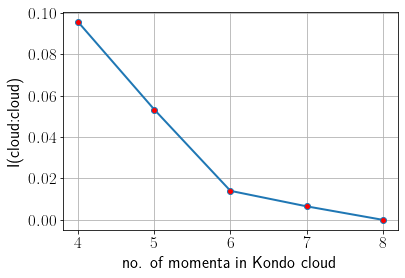

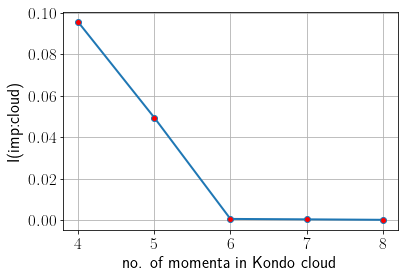

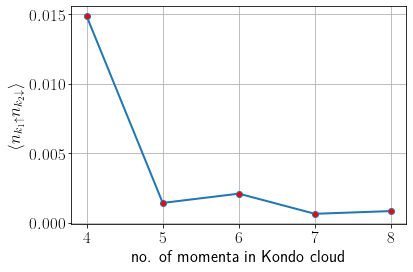

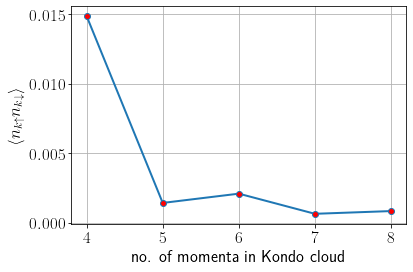

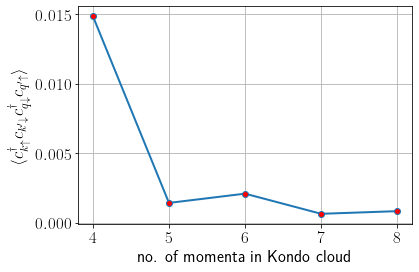

In [13]:
# !apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

I1 = np.array([0.09560258894703233, 0.053308137769454644, 0.014014944219370051, 0.0065338373289912655, 7.827715309660643e-06])
I3 = np.array([0.09560258894703233, 0.049518816903725726, 0.0006669696097013622, 0.00046926792959223196, 0.00023912255141889105])
# I1 = np.array([0.6931471805599453, 0.5027994750013625, 0.44287078352334314, 0.3864835472164138, 0.2602715743804396, )0.26413910332887736]
corr_diag_spin= np.array([0.01484681922040148, 0.0014102824523514227, 0.0020764268326214524, 0.0006272492041761989,0.0008239299216066614] )
corr_off_diag= np.array([0.01484681922040148, 0.0014102824523514227, 0.0020764268326214524, 0.0006269357838438394,0.0008176891175559328] )
corr_diag_ch = np.array([0.01484681922040148, 0.0014102824523514227, 0.0020764268326214524, 0.0006272492041761989,0.0008239299216066614] )

'''corrs = [
0.2472037332913408, 0.5, 0.0, 0.0]
0
[0.001838969723091228, 0.2033775756011223, -2.395501581717002e-06, 8.418052584954193e-06]
1
[0.0031849587068003785, 0.16324321724051036, -1.0674324405191036e-06, 0.00019846561793481634]
2
[0.0006373262042843603, 0.1471330701462955, 7.597450009337662e-06, 0.006446976306860242]
3
[0.0026778433681072557, 0.1318862466660754, 0.00014663777870428625, 0.07707810516699248]
4
[0.0013237558398355744, 0.13305295934205227, 0.0008753705255651228, 0.0786918237687373]]
]'''

plt.plot(range(4,9), I1, marker="o", mfc = "r")
plt.xlabel(r"no. of momenta in Kondo cloud")
plt.ylabel(r"I(cloud:cloud)")
plt.show()
plt.plot(range(4,9), I3, marker="o", mfc = "r")
plt.xlabel(r"no. of momenta in Kondo cloud")
plt.ylabel(r"I(imp:cloud)")
plt.show()
plt.plot(range(4,9), corr_diag_spin, marker="o", mfc = "r")
plt.xlabel(r"no. of momenta in Kondo cloud")
plt.ylabel(r"$\langle n_{k_1 \uparrow} n_{k_2 \downarrow}\rangle$")
plt.show()
plt.plot(range(4,9), corr_diag_ch, marker="o", mfc = "r")
plt.xlabel(r"no. of momenta in Kondo cloud")
plt.ylabel(r"$\langle n_{k \uparrow} n_{k \downarrow}\rangle$")
plt.show()
plt.plot(range(4,9), corr_off_diag, marker="o", mfc = "r")
plt.xlabel(r"no. of momenta in Kondo cloud")
plt.ylabel(r"$\langle c^\dagger_{k \uparrow}c_{k^\prime \downarrow}c^\dagger_{q \downarrow}c_{q^\prime \uparrow}\rangle$")
plt.show()

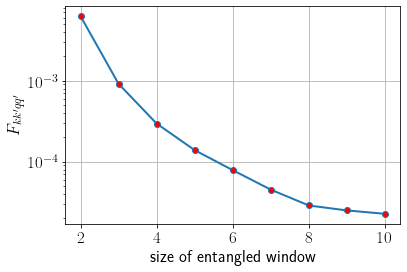

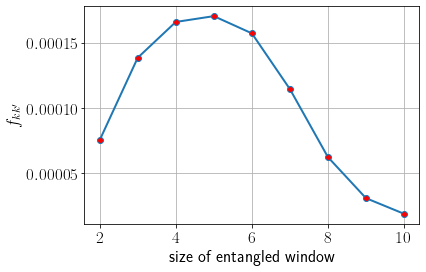

In [24]:
def get_xi(Ek, flag=False):
    if flag == False:
        J_ = 0
    else:
        J_ = J
    return Ek/(Eg + J_/4) + (Ek/(Eg + J_/4))**2


U_arr =  [0, 0, 0, 0, 0.06463131507519854, 0.3832892301648289, 0.81035398312819, 0.9653022499322309, 1]
J_arr =  [0.4671215288625387, 0.1610471732413586, 0.09292714506948394, 0.06570355318275373, 0.0515190332875324, 0.04292128519020507, 0.0371787477122733, 0.03307692307692307, 0.03]
K_arr =  [0.4671215288625387, 0.1610471732413586, 0.09292714506948394, 0.06570355318275373, 0.0515190332875324, 0.04292128519020507, 0.0371787477122733, 0.03307692307692307, 0.03]
V_arr =  [3.31196040544157, 0.8600731642469739, 0.40964223204281247, 0.2526301643610369, 0.17618732751694133, 0.12356402131908403, 0.06672654361752858, 0.032185777536821183, 0.02]
count_arr =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
D_arr =  [0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
F = []
f = []
for i in range(9):
    D = D_arr[i]
    J = J_arr[i]
    U = U_arr[i]
    V = V_arr[i]
    count = count_arr[i]
    N = 2 * count
    K = 0
    j = J * N
    v = V * sqrt(N)
    k = 0
    gamma = (3*j + k + 2*U)/(8*v)
    Eg = -U/2 - 3*j/4 + v * (gamma - sqrt(gamma*2 + 4))
    Ek = [ -0.2, -0.1, 0.1, 0.2]
    #        q,   qp,   k,   kp
    xi = list(map(get_xi, Ek))
    xi_J = [get_xi(0.1, True), get_xi(0.2, True)]
    F.append((V**2/(Eg * N * (Eg + J/4))) * ((V**2/(Eg * N)) * (xi[3] - xi[2] + 2) * (xi[0] + xi[1]) + (J/2) * (xi[0]+xi[1]-xi[2]+xi[3] + 2)) + (J**2/(4*(Eg + J/4))) * (xi_J[1] - xi_J[0]))
    f.append(Ek[2]*Ek[1]*(J**2/(4*(Eg + J/4)**3) + 2*V**2/Eg**3))
    # f.append(Eg)
    

plt.plot(range(2, 2+9), F, marker= "o", mfc = "r")
plt.yscale("log")
plt.ylabel(r"$F_{kk^\prime q q^\prime}$")
plt.xlabel(r"size of entangled window")
plt.show()
plt.plot(range(2, 2+9), f, marker= "o", mfc = "r")
# plt.yscale("log")
plt.ylabel(r"$f_{kk^\prime}$")
plt.xlabel(r"size of entangled window")
plt.show()


